In [2]:
import pandas as pd

data = pd.read_excel('Test prise données ZipGrow 2024 (réponses).xlsx', None)  # None to read all sheets if present


In [3]:
# Rename the columns in the data
data_renamed = data['Réponses au formulaire 1'].copy()
column_mapping = {
    'Horodatage': 'Timestamp',
    'Date (mm/dd)': 'Date',
    'Heure prise données (__h__)': 'Time of Data Collection',
    'Zone :\nZP = Zip Grow Global / EAU = Bac à eau / PHD = Côté Palais - haut droit / PHG = Côté Palais - haut gauche /\nPBD = Côté Palais - bas droit / PBG = Côté Palais - bas gauche / RHD = Côté Rue - haut droit\nRHG = Côté Rue - haut gauche / RBD = Côté Rue - bas droit / RBG = Côté Rue - bas gauche': 'Zone',
    'Température air (°C)': 'Air Temperature (°C)',
    'Humidité (%)': 'Humidity (%)',
    'Température eau (°C)': 'Water Temperature (°C)',
    'pH (avant ajout, si ajout)': 'pH (Before Addition, if Any)',
    'pH (après ajout)': 'pH (After Addition)',
    'Conductivité (mS) (avant ajout)': 'Conductivity (mS) (Before Addition)',
    'Conductivité (mS) (après ajout)': 'Conductivity (mS) (After Addition)',
    'Hauteur eau dans le bac (gallons) (avant ajout si ajout)': 'Water Level in Tank (Gallons) (Before Addition, if Any)',
    'Hauteur eau dans le bac (gallons) (après ajout)': 'Water Level in Tank (Gallons) (After Addition)',
    'Commentaire/action réalisé': 'Comment/Action Taken',
    'Unnamed: 14': 'Additional Notes'  # Assuming this title based on context
}
data_renamed.rename(columns=column_mapping, inplace=True)

# Display the renamed dataset
data_renamed.head()


,Timestamp,Date,Time of Data Collection,Zone,Substrat,Rendements (g),Taille plants (cm),Conductivité (mS) (avant ajout si ajout),Conductivity (mS) (After Addition),"pH (Before Addition, if Any)",pH (After Addition),"Water Level in Tank (Gallons) (Before Addition, if Any)",Water Level in Tank (Gallons) (After Addition),Comment/Action Taken,Additional Notes
0,2024-06-30 17:21:45.584,06/17,10h00,EAU,Firbre de coco,NaN,NaN,1.21,NaN,6.4,NaN,100 gallons,NaN,"Ajout acide (8,1 -> 6,4)",Environ 138 plants de basilic grec plantés
1,2024-06-30 17:23:46.767,06/18,10h00,EAU,Firbre de coco,NaN,NaN,1.08,NaN,8.2,5.7,80,NaN,ajout 45 mL de pH-,NaN
2,2024-06-30 17:26:56.276,06/19,10h00,EAU,Firbre de coco,NaN,NaN,1.21,1.11,7.0,5.0,40,100.0,Ajout 1/2 pot d'engrais + 40 mL de pH,NaN
3,2024-06-30 17:48:27.121,06/20,10h00,EAU,Firbre de coco,NaN,NaN,1.03,1.25,6.9,5.7,70,100.0,1/2 pot engrais + 45mL de pH-,NaN
4,2024-06-30 17:50:45.608,06/21,10h00,EAU,Firbre de coco,NaN,NaN,1.23,NaN,7.0,6.0,85,NaN,Ajout 30mL pH-,NaN


In [4]:
# Convert 'Timestamp' to datetime format if not already
data_renamed['Timestamp'] = pd.to_datetime(data_renamed['Timestamp'])

# Extracting hours and minutes from 'Time of Data Collection' and creating a new time column
# Assuming the format is consistently like "10h00"
data_renamed['Time of Data Collection (Cleaned)'] = pd.to_datetime(data_renamed['Time of Data Collection'].str.replace('h', ':'),
                                                                  format='%H:%M').dt.time

# Show the updated dataset to verify the changes
data_renamed[['Timestamp', 'Time of Data Collection', 'Time of Data Collection (Cleaned)']].head()


,Timestamp,Time of Data Collection,Time of Data Collection (Cleaned)
0,2024-06-30 17:21:45.584,10h00,10:00:00
1,2024-06-30 17:23:46.767,10h00,10:00:00
2,2024-06-30 17:26:56.276,10h00,10:00:00
3,2024-06-30 17:48:27.121,10h00,10:00:00
4,2024-06-30 17:50:45.608,10h00,10:00:00


In [5]:
# Calculate descriptive statistics for the numeric columns in the dataset
descriptive_statistics = data_renamed.describe()
descriptive_statistics


,Timestamp,Rendements (g),Taille plants (cm),Conductivité (mS) (avant ajout si ajout),Conductivity (mS) (After Addition),"pH (Before Addition, if Any)",pH (After Addition),Water Level in Tank (Gallons) (After Addition)
count,8,0.0,0.0,8.000000,3.000000,8.000000,6.000000,4.0
mean,2024-06-30 17:41:31.916000,NaN,NaN,1.146250,1.276667,6.600000,5.433333,100.0
min,2024-06-30 17:21:45.584000,NaN,NaN,0.600000,1.110000,4.000000,4.800000,100.0
25%,2024-06-30 17:26:08.898749952,NaN,NaN,1.067500,1.180000,6.400000,5.100000,100.0
50%,2024-06-30 17:49:36.364499968,NaN,NaN,1.210000,1.250000,6.900000,5.550000,100.0
75%,2024-06-30 17:52:27.431249920,NaN,NaN,1.250000,1.360000,7.000000,5.700000,100.0
max,2024-06-30 17:54:47.815000,NaN,NaN,1.500000,1.470000,8.200000,6.000000,100.0
std,NaN,NaN,NaN,0.262784,0.181475,1.189237,0.458984,0.0


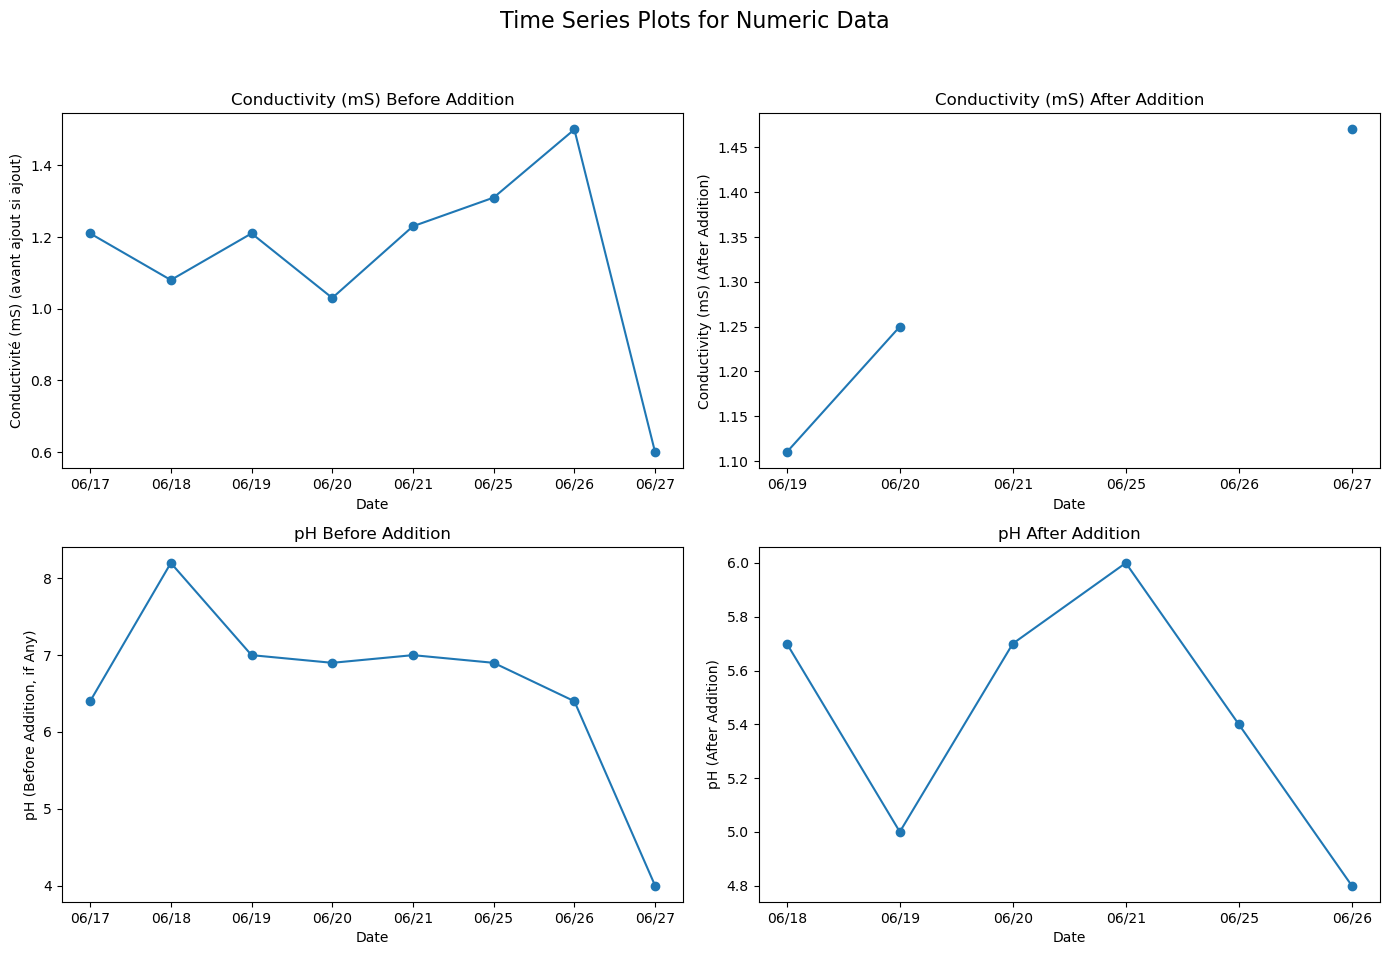

In [7]:
import matplotlib.pyplot as plt

# Setting up the figure and axes for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Time Series Plots for Numeric Data', fontsize=16)

# Plot for each numeric column
time_series_columns = [
    'Conductivité (mS) (avant ajout si ajout)',
    'Conductivity (mS) (After Addition)',
    'pH (Before Addition, if Any)',
    'pH (After Addition)',
]

# Titles for plots
plot_titles = [
    'Conductivity (mS) Before Addition',
    'Conductivity (mS) After Addition',
    'pH Before Addition',
    'pH After Addition',
]

# Creating plots
for ax, column, title in zip(axes.flatten(), time_series_columns, plot_titles):
    data_renamed.plot(x='Date', y=column, ax=ax, legend=False, marker='o', linestyle='-')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel(column)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


In [ ]:
how many sections do you have
then ask the starting column a